# Custom dataset

## Prepare dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download super-ai-engineer-2021-properties-tagging
! kaggle competitions download super-ai-engineer-2021-house-grade-classification

100% 4.04G/4.05G [00:42<00:00, 133MB/s]
100% 4.05G/4.05G [00:42<00:00, 102MB/s]
 99% 2.30G/2.31G [00:23<00:00, 132MB/s]
100% 2.31G/2.31G [00:23<00:00, 107MB/s]


In [ ]:
!unzip /content/super-ai-engineer-2021-properties-tagging.zip -d /content/task2
!unzip /content/super-ai-engineer-2021-house-grade-classification.zip -d /content/task1

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: /content/task2/extra/img_13-8067058_100-5804031_a90-96423767_s0-9642376699999886_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067473_100-5777149_a1-80176007_s91-80176007_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067639_100-5656579_a327-7831492_s237-78314920000003_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067639_100-5656579_a327-7831492_s57-783149200000025_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067644_100-5893024_a87-77464259_s177-77464258999998_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067644_100-5893024_a87-77464259_s357-77464259_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067875_100-587404_a99-63830441_s9-63830440999999_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8068085_100-5951222_a167-5624936_s257-56249360000004_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8068085_100-5951222_a167-5624936_s77-5624936000

In [ ]:
!mv "/content/task1/train" "/content/task2"
!mv "/content/task1/test" "/content/task2"

In [ ]:
!rm -r "/content/task1"

## Preprocess data

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/task2/train.csv')
extra_df = pd.read_csv('/content/task2/extra.csv')

In [ ]:
one_hot = train_df['labels'].str.get_dummies(sep=' ')
train_df = pd.concat([train_df, one_hot], axis=1)

one_hot = extra_df['labels'].str.get_dummies(sep=' ')
extra_df = pd.concat([extra_df, one_hot], axis=1)

In [ ]:
train_df['path'] = '/content/task2/train/' + train_df['filename']
extra_df['path'] = '/content/task2/extra/' + extra_df['filename']

In [ ]:
train_df = pd.concat([train_df, extra_df], ignore_index=True)

In [ ]:
from tqdm.notebook import tqdm
str_labels = []
for i in tqdm(range (0, len(train_df))):
  txt_l = []
  labels = train_df.loc[i, 'labels'].split(' ')
  for e in labels:
    if e == '0':
      txt_l.append('no')
    elif e == '1':
      txt_l.append('camera')
    elif e == '2':
      txt_l.append('parking')
    elif e == '3':
      txt_l.append('car')
    elif e == '4':
      txt_l.append('shrine')
    elif e == '5':
      txt_l.append('backyard')
  str_labels.append(" ".join(txt_l))
    
    


  0%|          | 0/8841 [00:00<?, ?it/s]

In [ ]:
train_df['description'] = str_labels
train_df

,filename,labels,0,1,2,3,4,5,path,description
0,ChokChai4_img_13-7955799_100-6031141_a187-2159...,0,1,0,0,0,0,0,/content/task2/train/ChokChai4_img_13-7955799_...,no
1,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,1,0,0,0,0,0,/content/task2/train/ChokChai4_img_13-7956791_...,no
2,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,1,0,0,0,0,0,/content/task2/train/ChokChai4_img_13-7956791_...,no
3,ChokChai4_img_13-7961753_100-6031881_a185-9785...,0,1,0,0,0,0,0,/content/task2/train/ChokChai4_img_13-7961753_...,no
4,ChokChai4_img_13-7969811_100-5906061_a180-5812...,0,1,0,0,0,0,0,/content/task2/train/ChokChai4_img_13-7969811_...,no
...,...,...,...,...,...,...,...,...,...,...
8836,img_13-7643371_100-539753_a30-82040882_s300-82...,3,0,0,0,1,0,0,/content/task2/extra/img_13-7643371_100-539753...,car
8837,img_13-7667727_100-5356214_a25-41138042_s115-4...,0,1,0,0,0,0,0,/content/task2/extra/img_13-7667727_100-535621...,no
8838,img_13-7667727_100-5356214_a25-41138042_s295-4...,3,0,0,0,1,0,0,/content/task2/extra/img_13-7667727_100-535621...,car
8839,img_13-7670169_100-5357421_a25-40547316_s115-4...,2 3,0,0,1,1,0,0,/content/task2/extra/img_13-7670169_100-535742...,parking car


In [ ]:
df = train_df.drop(columns = ['labels', '0', '1', '2', '3', '4', '5'])
df

,filename,path,description
0,ChokChai4_img_13-7955799_100-6031141_a187-2159...,/content/task2/train/ChokChai4_img_13-7955799_...,no
1,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/task2/train/ChokChai4_img_13-7956791_...,no
2,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/task2/train/ChokChai4_img_13-7956791_...,no
3,ChokChai4_img_13-7961753_100-6031881_a185-9785...,/content/task2/train/ChokChai4_img_13-7961753_...,no
4,ChokChai4_img_13-7969811_100-5906061_a180-5812...,/content/task2/train/ChokChai4_img_13-7969811_...,no
...,...,...,...
8836,img_13-7643371_100-539753_a30-82040882_s300-82...,/content/task2/extra/img_13-7643371_100-539753...,car
8837,img_13-7667727_100-5356214_a25-41138042_s115-4...,/content/task2/extra/img_13-7667727_100-535621...,no
8838,img_13-7667727_100-5356214_a25-41138042_s295-4...,/content/task2/extra/img_13-7667727_100-535621...,car
8839,img_13-7670169_100-5357421_a25-40547316_s115-4...,/content/task2/extra/img_13-7670169_100-535742...,parking car


# Image Captioning

## Torch

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence


In [ ]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)
        modules = list(resnet.children())[:-1]      # delete the last fc layer.
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seg_length = max_seq_length
        
    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.lstm(packed)
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)                        # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids

# TF

In [ ]:
import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# your model focuses on during captioning
import matplotlib.pyplot as plt

import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

In [ ]:
# # Download caption annotation files
# annotation_folder = '/annotations/'
# if not os.path.exists(os.path.abspath('.') + annotation_folder):
#   annotation_zip = tf.keras.utils.get_file('captions.zip',
#                                            cache_subdir=os.path.abspath('.'),
#                                            origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
#                                            extract=True)
#   annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
#   os.remove(annotation_zip)

# # Download image files
# image_folder = '/train2014/'
# if not os.path.exists(os.path.abspath('.') + image_folder):
#   image_zip = tf.keras.utils.get_file('train2014.zip',
#                                       cache_subdir=os.path.abspath('.'),
#                                       origin='http://images.cocodataset.org/zips/train2014.zip',
#                                       extract=True)
#   PATH = os.path.dirname(image_zip) + image_folder
#   os.remove(image_zip)
# else:
#   PATH = os.path.abspath('.') + image_folder

In [ ]:
# with open(annotation_file, 'r') as f:
#     annotations = json.load(f)

In [ ]:
# Group all captions together having the same image ID.
# image_path_to_caption = collections.defaultdict(list)
# for val in annotations['annotations']:
#   caption = f"<start> {val['caption']} <end>"
#   image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
#   image_path_to_caption[image_path].append(caption)
image_path_to_caption = collections.defaultdict(list)
for i in tqdm(range (0, len(df))):
  caption = f"<start> {df.loc[i, 'description']} <end>"
  #print(caption)
  image_path_to_caption[df.loc[i, 'path']].append(caption)

  0%|          | 0/8841 [00:00<?, ?it/s]

In [ ]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will
# lead to 30,000 examples.
train_image_paths = image_paths
print(len(train_image_paths))

8841


In [ ]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

<start> no <end>


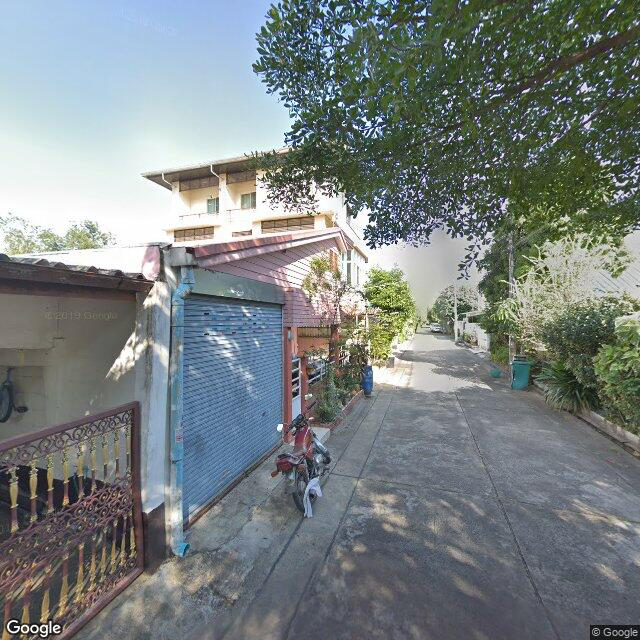

In [ ]:
print(train_captions[99])
Image.open(img_name_vector[99])

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(224,224)(img)
    img = tf.keras.applications.vgg19.preprocess_input (img)
    return img, image_path

In [ ]:
image_model = tf.keras.applications.VGG19(include_top=False,
                                                weights='imagenet')
image_model.trainable = False
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

In [ ]:
image_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [ ]:
for img, path in image_dataset:
  batch_features = image_features_extract_model(img)
  # print(batch_features.shape)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))
  print(batch_features.shape)
  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 49, 512)
(16, 4

In [ ]:
caption_dataset = tf.data.Dataset.from_tensor_slices(train_captions)

# We will override the default standardization of TextVectorization to preserve
# "<>" characters, so we preserve the tokens for the <start> and <end>.
def standardize(inputs):
  inputs = tf.strings.lower(inputs)
  return tf.strings.regex_replace(inputs,
                                  r"!\"#$%&\(\)\*\+.,-/:;=?@\[\\\]^_`{|}~", "")

# Max word count for a caption.
max_length = 50
# Use the top 5000 words for a vocabulary.
vocabulary_size = 5000
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=standardize,
    output_sequence_length=max_length)
# Learn the vocabulary from the caption data.
tokenizer.adapt(caption_dataset)

In [ ]:
tokenizer.get_vocabulary()

['',
 '[UNK]',
 '<start>',
 '<end>',
 'no',
 'car',
 'parking',
 'backyard',
 'shrine',
 'camera']

In [ ]:
# Create the tokenized vectors
cap_vector = caption_dataset.map(lambda x: tokenizer(x))

In [ ]:
# Create mappings for words to indices and indicies to words.
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

In [ ]:

img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.85)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

In [ ]:
img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [ ]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 16
BUFFER_SIZE = 1000
embedding_dim = 49
units = 512
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 512
attention_features_shape = 49

In [ ]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Model

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units) #units = 512
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim) 

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # Remark ควรแก้
    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [ ]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    # self.fc2 = tf.keras.layers.Dense(vocab_size, activation = 'sigmoid')
    self.fc2 = tf.keras.layers.Dense(vocab_size)


    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights
  
  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

  @tf.function
  def reset_state(self, batch_size):
    """ tf.function-decorated version of _reset_state """
    return self.reset_state(batch_size)

  

In [ ]:
encoder = CNN_Encoder(embedding_dim)
# decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())
decoder = RNN_Decoder(embedding_dim, units, 5000)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
#แก้ตรงนี้
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

# loss_object = tf.keras.losses.BinaryCrossentropy(
#     from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer,
                           )
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

# Training

In [ ]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

In [ ]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])
  print(target.shape)
  dec_input = tf.expand_dims([word_to_index('<start>')] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)
      print(features.shape)
      # print(features)

      for i in range(1, target.shape[1]):
          
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)
      
  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [ ]:
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

StagingError: ignored

# Evaluate

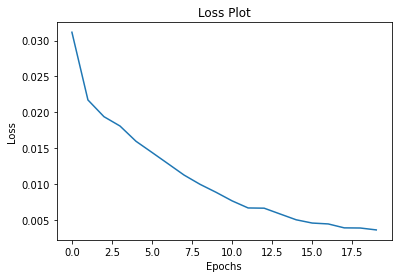

In [ ]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [ ]:
encoder3 = encoder2
decoder3 = decoder2

In [ ]:
encoder2 = encoder
decoder2 = decoder
# encoder = tf.keras.models.load_model('/content/VGG19encoder')
# decoder = tf.keras.models.load_model('/content/VGG19decoder')

In [ ]:
encoder = CNN_Encoder(embedding_dim)
# decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())
decoder = RNN_Decoder(embedding_dim, units, 5000)

In [ ]:
embedding_dim

49

In [ ]:
input_shape = (None, 49, 512)
encoder.build(input_shape) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
encoder.summary()

Model: "cnn__encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  25137     
                                                                 
Total params: 25,137
Trainable params: 25,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder4 = encoder3

In [ ]:
decoder4 = decoder3

In [ ]:
encoder4.save_weights('./weight_en')

In [ ]:
mm_encoder = CNN_Encoder(embedding_dim)
# decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())
mm_decoder = RNN_Decoder(embedding_dim, units, 5000)

In [ ]:
encoder4.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
decoder4.save('my_dec')

INFO:tensorflow:Assets written to: my_dec/assets


INFO:tensorflow:Assets written to: my_dec/assets


In [ ]:
loaded_1 = tf.keras.models.load_model(
    "my_dec", custom_objects={"RNN_Decoder": RNN_Decoder, 'reset_state' :mm_decoder.reset_state}
)

In [ ]:
loaded_2 = tf.keras.models.load_model(
    "my_model"
)

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder3.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder3(img_tensor_val)

    dec_input = tf.expand_dims([word_to_index('<start>')], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder3(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(index_to_word(predicted_id).numpy())
        result.append(predicted_word)

        if predicted_word == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [ ]:
# encoder.save('/content/VGG19encoder')

In [ ]:
# decoder.save('/content/VGG19decoder')

In [ ]:
# !zip -r '/content/VGG19encoder.zip' '/content/VGG19encoder'
# !zip -r '/content/VGG19decoder.zip' '/content/VGG19decoder'

In [ ]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(int(np.ceil(len_result/2)), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

In [ ]:
!zip -r '/content/my_dec.zip' '/content/my_dec'
!zip -r '/content/my_enc.zip' '/content/my_model'

  adding: content/my_dec/ (stored 0%)
  adding: content/my_dec/assets/ (stored 0%)
  adding: content/my_dec/saved_model.pb (deflated 90%)
  adding: content/my_dec/keras_metadata.pb (deflated 87%)
  adding: content/my_dec/variables/ (stored 0%)
  adding: content/my_dec/variables/variables.index (deflated 53%)
  adding: content/my_dec/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/my_model/ (stored 0%)
  adding: content/my_model/assets/ (stored 0%)
  adding: content/my_model/saved_model.pb (deflated 85%)
  adding: content/my_model/keras_metadata.pb (deflated 66%)
  adding: content/my_model/variables/ (stored 0%)
  adding: content/my_model/variables/variables.index (deflated 30%)
  adding: content/my_model/variables/variables.data-00000-of-00001 (deflated 8%)


Real Caption: <start> car <end>
Prediction Caption: car <end>


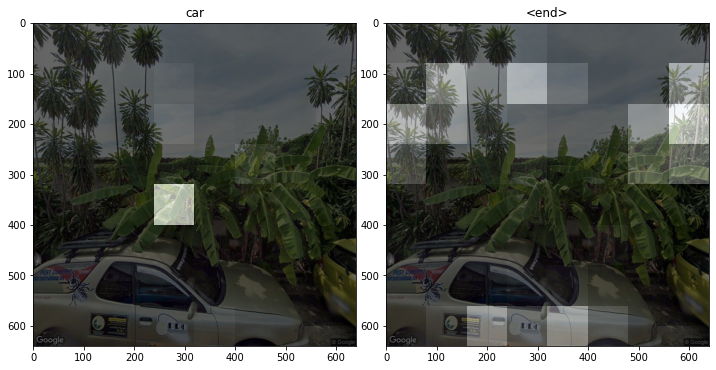

In [ ]:
#captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

In [ ]:
#captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

AttributeError: ignored

In [ ]:
!zip -r '/content/drive/MyDrive/FaiFolder/captioningVGG19.zip' '/content/checkpoints'

  adding: content/checkpoints/ (stored 0%)
  adding: content/checkpoints/train/ (stored 0%)
  adding: content/checkpoints/train/ckpt-3.index (deflated 68%)
  adding: content/checkpoints/train/ckpt-4.data-00000-of-00001 (deflated 24%)
  adding: content/checkpoints/train/ckpt-1.index (deflated 68%)
  adding: content/checkpoints/train/ckpt-3.data-00000-of-00001 (deflated 24%)
  adding: content/checkpoints/train/checkpoint (deflated 68%)
  adding: content/checkpoints/train/ckpt-4.index (deflated 68%)
  adding: content/checkpoints/train/ckpt-2.index (deflated 68%)
  adding: content/checkpoints/train/ckpt-1.data-00000-of-00001 (deflated 23%)
  adding: content/checkpoints/train/ckpt-2.data-00000-of-00001 (deflated 24%)


## Submission

In [ ]:
import glob
test_path = glob.glob('/content/task2/test/*')
len(test_path)

450

In [ ]:
labels = {'no' : '0', 'camera':'1', 'parking':'2', 'car':'3', 'shrine':'4', 'backyard':'5'}

In [ ]:
attention_plots = []
results = []
labels_results = []
for p in tqdm(test_path):
  result, attention_plot = evaluate(p)
  txt_l = []
  for r in result:
    try:
      txt_l.append(labels[r])
    except:
      pass
  results.append(result)
  labels_results.append(" ".join(txt_l))
  attention_plots.append(attention_plot)
# print('Prediction Caption:', ' '.join(result))
# plot_attention(image_path, result, attention_plot)
# opening the image
# Image.open(image_path)

  0%|          | 0/450 [00:00<?, ?it/s]

In [ ]:
results[:20], labels_results[:20]

([['no', '<end>'],
  ['parking', '<end>'],
  ['no', '<end>'],
  ['no', '<end>'],
  ['car', '<end>'],
  ['parking', 'car', 'shrine', '<end>'],
  ['no', '<end>'],
  ['no', '<end>'],
  ['parking', '<end>'],
  ['parking', '<end>'],
  ['no', '<end>'],
  ['parking', '<end>'],
  ['parking', 'shrine', 'shrine', '<end>'],
  ['car', '<end>'],
  ['car', '<end>'],
  ['no', '<end>'],
  ['no', '<end>'],
  ['parking', '<end>'],
  ['car', '<end>'],
  ['no', '<end>']],
 ['0',
  '2',
  '0',
  '0',
  '3',
  '2 3 4',
  '0',
  '0',
  '2',
  '2',
  '0',
  '2',
  '2 4 4',
  '3',
  '3',
  '0',
  '0',
  '2',
  '3',
  '0'])

Prediction Caption: parking <end>


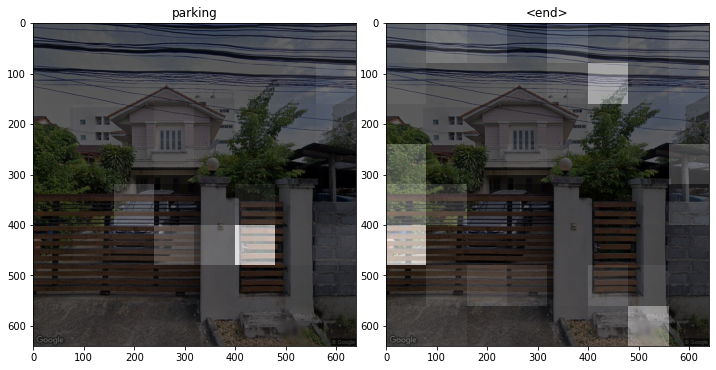

In [ ]:
p = 20
print('Prediction Caption:', ' '.join(results[p]))
plot_attention(test_path[p], results[p], attention_plots[p])

In [ ]:
prediction = pd.DataFrame({'Id': test_path, 'Predicted' : labels_results})
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         450 non-null    object
 1   Predicted  450 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB


In [ ]:
prediction['Id'] = prediction['Id'].str.split('/').str[-1].str.split('.jpg').str[0]

In [ ]:
sample = pd.read_csv('/content/task2/sample_submission.csv')
submit = pd.merge(sample, prediction, on='Id', how = 'left')
submit.drop(columns = ['Labels'], inplace = True)
submit = submit.rename(columns = {'Predicted':'Labels'})
submit.groupby('Labels').count()

,Id
Labels,
0,247
1,1
1 2 3,1
2,40
2 3,41
2 3 2 3 2 3 2 3 2 3 4 5,1
2 3 4,8
2 3 4 2 2 3 4 2 3 2 2 3,1
2 3 5,1


In [ ]:
submit.loc[submit[submit['Labels'] == '2 3 2 3 2 3 2 3 2 3 4 5'].index, 'Labels'] = '2 3 4 5'
submit.loc[submit[submit['Labels'] == '2 3 4 2 2 3 4 2 3 2 2 3'].index, 'Labels'] = '2 3 4'
submit.loc[submit[submit['Labels'] == '2 4 4'].index, 'Labels'] = '2 4'
submit.loc[submit[submit['Labels'] == '4 4'].index, 'Labels'] = '4'

In [ ]:
submit.groupby('Labels').count()

,Id
Labels,
0,1347
1,1
1 2 3,1
2,40
2 3,41
2 3 4,9
2 3 4 5,1
2 3 5,1
2 4,2


In [ ]:
submit.fillna('0', inplace = True)

In [ ]:
submit.to_csv('vgg19_gru_imgcaptioning.csv', index=False)

#**Encoder Decoder New Version**